 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Set file path

#whale_returns_path = Path("../Resources/whale_returns.csv")
#algo_returns_path = Path("../Resources/algo_returns.csv")
#sp_tsx_history_path = Path("../Resources/sp_tsx_history.csv")


In [3]:
# Reading whale returns

whale_df = pd.read_csv("whale_returns.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_df = pd.read_csv("algo_returns.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls

algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls

algo_df.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices

spy_df = pd.read_csv("sp_tsx_history.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
spy_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types

spy_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types

spy_df['Close'] = spy_df["Close"].replace({"\$":"",",":""}, regex = True)
spy_df['Close'] = spy_df["Close"].astype(float)

spy_df.head()


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [12]:
# Calculate Daily Returns

spy_daily_returns = spy_df.pct_change()
spy_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [13]:
# Drop nulls
spy_daily_returns.dropna(inplace=True)

In [14]:
# Rename `Close` Column to be specific to this portfolio.

spy_daily_returns.columns = ['S&P TSX 60']
spy_daily_returns.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_df, algo_df, spy_daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'All Returns'}, xlabel='Date'>

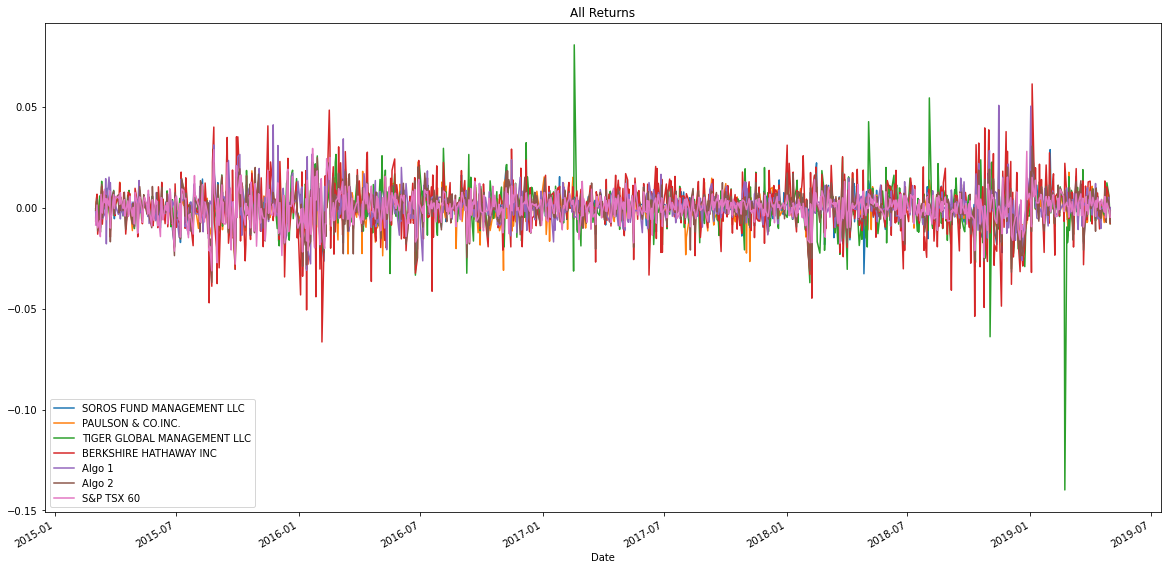

In [16]:
# Plot daily returns of all portfolios

combined_df.plot(figsize=(20, 10), title="All Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

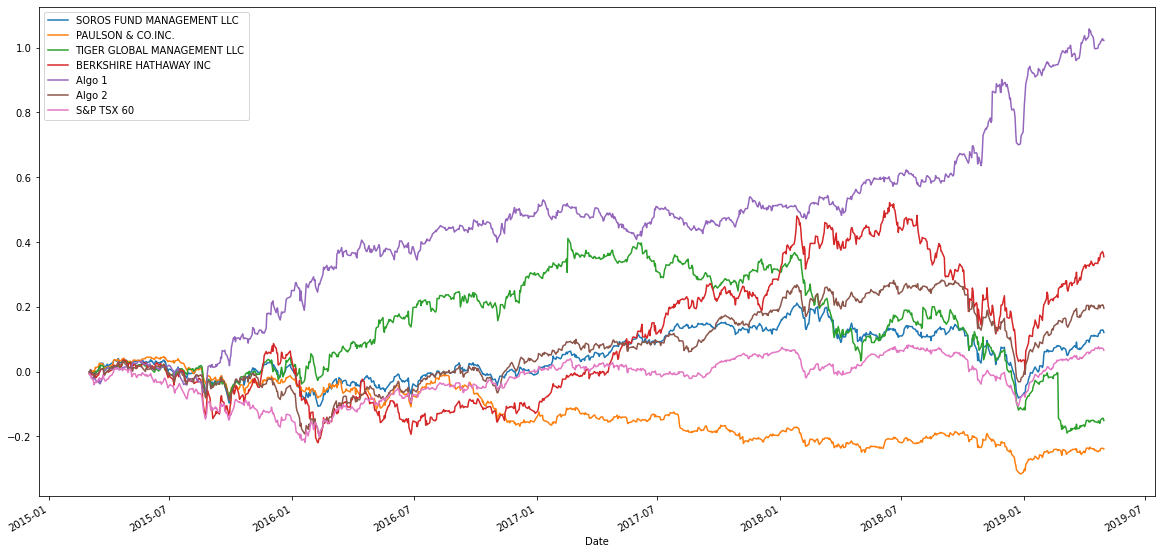

In [17]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns

# Plot cumulative returns

cumulative_returns.plot(figsize = (20, 10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


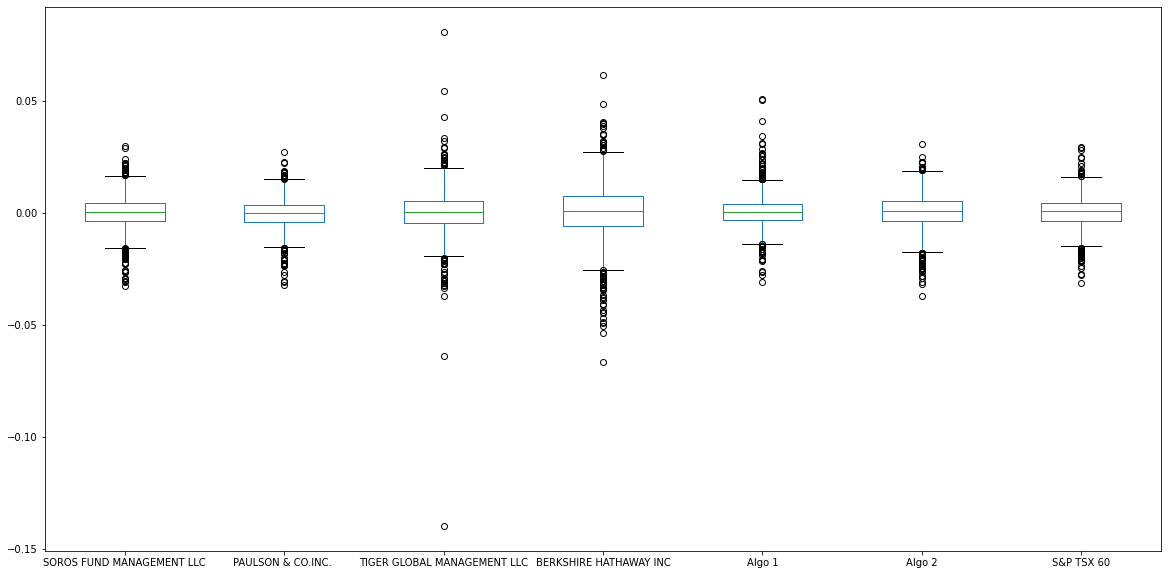

In [18]:
# Box plot to visually show risk

combined_box_plot= combined_df.boxplot(figsize=(20,10), grid = False)

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios

combined_daily_std = combined_df.std()
combined_daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [25]:
# Calculate  the daily standard deviation of S&P TSX 60

daily_std_spy = combined_daily_std['S&P TSX 60']


# Determine which portfolios are riskier than the S&P TSX 60

combined_daily_std > combined_daily_std ["S&P TSX 60"]


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX 60                     False
dtype: bool

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)

combined_annual_std = combined_df.std() * np.sqrt(252)
combined_annual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-day Window'}, xlabel='Date'>

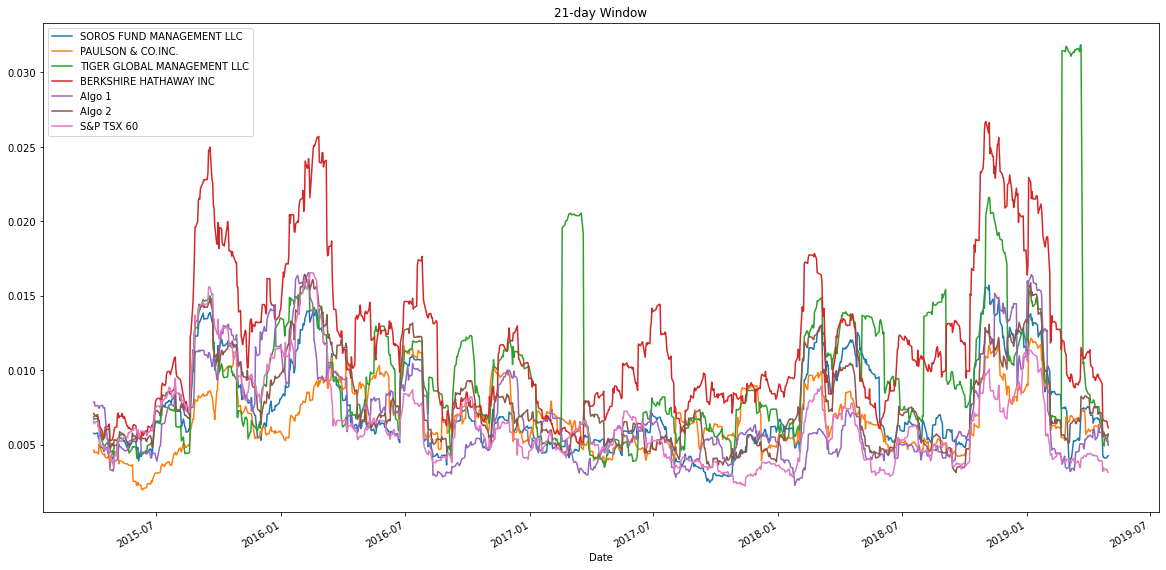

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_21day_std = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation

combined_21day_std.plot(figsize=(20, 10), title="21-day Window")

### Calculate and plot the correlation

<AxesSubplot:>

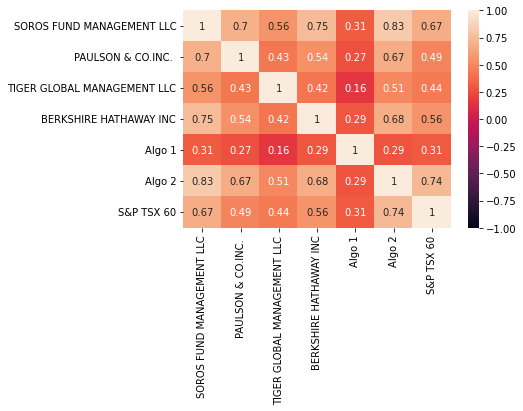

In [29]:
# Calculate the correlation

correlation = combined_df.corr()

# seaborn function

import seaborn as sns

# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

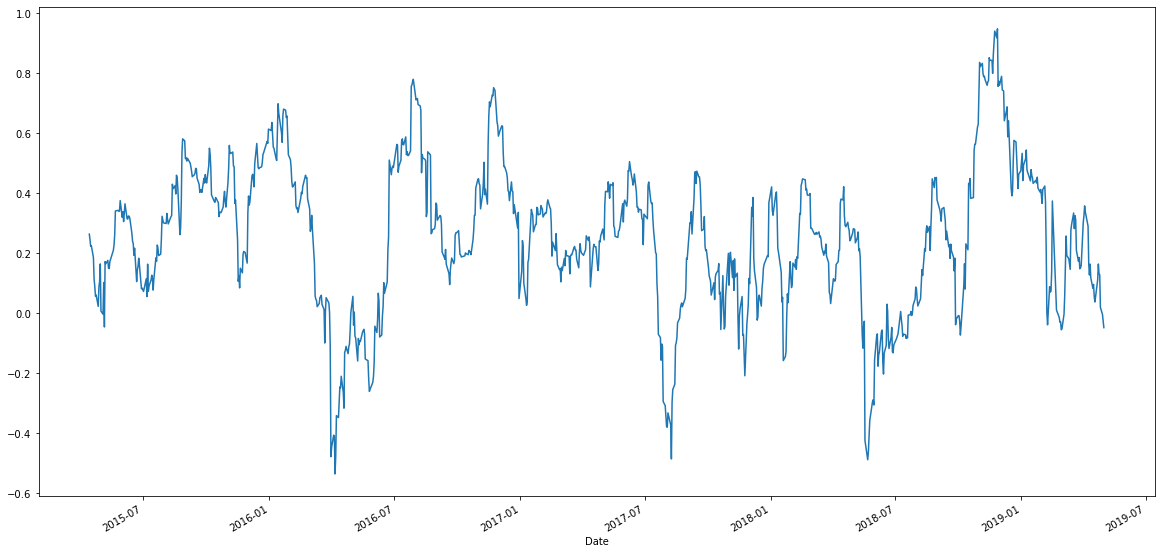

In [31]:
# Calculate covariance of a single portfolio

rolling_algo_1_covariance = combined_df["Algo 1"].rolling(window = 30).cov(combined_df["S&P TSX 60"])

# Calculate variance of S&P TS

rolling_spy_variance = combined_df["S&P TSX 60"].rolling(window = 30).var()

# Computing beta

rolling_algo_1_beta = rolling_algo_1_covariance / rolling_spy_variance


# Plot beta trend

rolling_algo_1_beta.plot(figsize = (20,10)) 


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

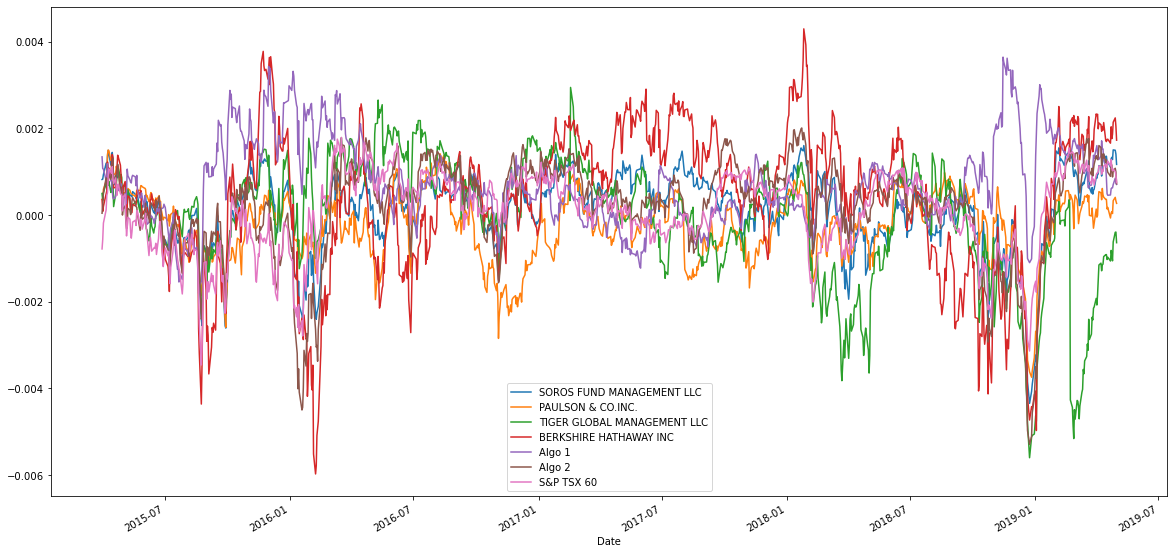

In [32]:
# Use `ewm` to calculate the rolling window

ewm = combined_df.ewm(min_periods = 21, halflife = 21).mean().plot(figsize=(20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios

sharpe_ratios = ((combined_df.mean()-combined_df["S&P TSX 60"].mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.110980
PAULSON & CO.INC.             -0.744596
TIGER GLOBAL MANAGEMENT LLC   -0.270851
BERKSHIRE HATHAWAY INC         0.359795
Algo 1                         1.310258
Algo 2                         0.231615
S&P TSX 60                     0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

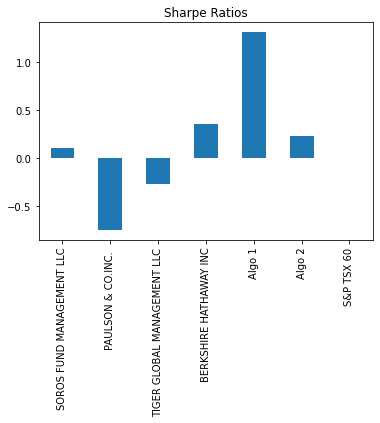

In [34]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [35]:
# Reading data from 1st stock

msft_df = pd.read_csv("msft_2021_returns.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
msft_df.head()

,Close
Date,
2021-04-01 16:00:00,217.69
2021-05-01 16:00:00,217.90
2021-06-01 16:00:00,212.25
2021-07-01 16:00:00,218.29
2021-08-01 16:00:00,219.62


In [36]:
# Reading data from 2nd stock
tsla_df = pd.read_csv("tsla_2021_returns.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
tsla_df.head()

,Close
Date,
2021-04-01 16:00:00,729.77
2021-05-01 16:00:00,735.11
2021-06-01 16:00:00,755.98
2021-07-01 16:00:00,816.04
2021-08-01 16:00:00,880.02


In [37]:
# Reading data from 3rd stock

jpm_df = pd.read_csv("jpm_2021_returns.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
jpm_df.head()


,Close
Date,
04/01/2021 16:00:00,125.87
05/01/2021 16:00:00,125.65
06/01/2021 16:00:00,131.55
07/01/2021 16:00:00,135.87
08/01/2021 16:00:00,136.02


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!